R² Score: 0.8177069544523099
RMSE: 3793.5400345763105


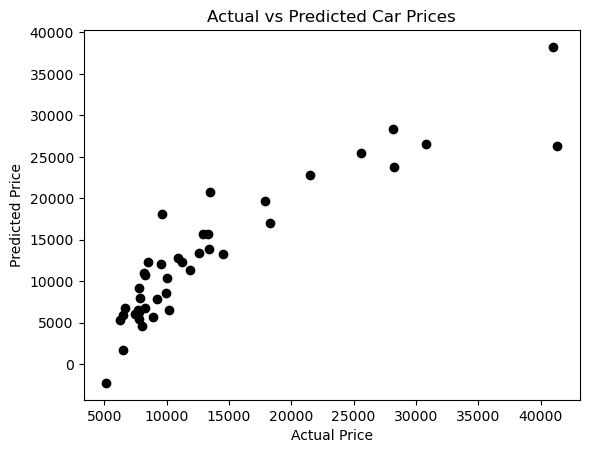

In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("data/CarPrice_Assignment.csv")
df_model = df.copy()

# Label Encoding (binary)
label_en = LabelEncoder()
columns = ['fueltype','doornumber','enginelocation']
for col in columns:
    df_model[col + "_encoded"] = label_en.fit_transform(df_model[col])

# One-Hot Encoding (nominal)
df_model = pd.get_dummies(df_model,columns = ['aspiration','fuelsystem','carbody','drivewheel'], drop_first = True)

# Drop non-useful columns
df_model = df_model.drop(['CarName','enginetype','cylindernumber'], axis = 1)

# Feature selection
feature_selection = ['wheelbase','carlength','carwidth','carheight','curbweight',
    'enginesize','boreratio','horsepower','citympg','highwaympg']
feature_selection += [col for col in df_model.columns
    if col.startswith('aspiration_')
    or col.startswith('fuelsystem_')
    or col.startswith('carbody_')
    or col.startswith('drivewheel_')]

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

x = df_model[feature_selection]
y = df_model["price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", rmse)

# Validation plot
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred,color = "black")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()